<a href="https://colab.research.google.com/github/heptaclone/Google-Colab-Data-Analysis/blob/main_branch/Parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.*

In [1]:
from google.colab import files
uploaded = files.upload()

Saving parkinsons_updrs.data to parkinsons_updrs.data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['parkinsons_updrs.data']))
df

subject#  age  sex  test_time  ...     HNR     RPDE      DFA      PPE
0            1   72    0     5.6431  ...  21.640  0.41888  0.54842  0.16006
1            1   72    0    12.6660  ...  27.183  0.43493  0.56477  0.10810
2            1   72    0    19.6810  ...  23.047  0.46222  0.54405  0.21014
3            1   72    0    25.6470  ...  24.445  0.48730  0.57794  0.33277
4            1   72    0    33.6420  ...  26.126  0.47188  0.56122  0.19361
...        ...  ...  ...        ...  ...     ...      ...      ...      ...
5870        42   61    0   142.7900  ...  22.369  0.64215  0.55314  0.21367
5871        42   61    0   149.8400  ...  22.886  0.52598  0.56518  0.12621
5872        42   61    0   156.8200  ...  25.065  0.47792  0.57888  0.14157
5873        42   61    0   163.7300  ...  24.422  0.56865  0.56327  0.14204
5874        42   61    0   170.7300  ...  23.259  0.58608  0.57077  0.15336

[5875 rows x 22 columns]

#***Understanding the Data***

In [4]:
df.shape

(5875, 22)

**This current dataset contains 5875 rows and 22 columns.**

In [5]:
df.head()

subject#  age  sex  test_time  ...     HNR     RPDE      DFA      PPE
0         1   72    0     5.6431  ...  21.640  0.41888  0.54842  0.16006
1         1   72    0    12.6660  ...  27.183  0.43493  0.56477  0.10810
2         1   72    0    19.6810  ...  23.047  0.46222  0.54405  0.21014
3         1   72    0    25.6470  ...  24.445  0.48730  0.57794  0.33277
4         1   72    0    33.6420  ...  26.126  0.47188  0.56122  0.19361

[5 rows x 22 columns]

**Head is basically shows 5 first rows of dataframe.**

In [6]:
df.describe()

subject#          age  ...          DFA          PPE
count  5875.000000  5875.000000  ...  5875.000000  5875.000000
mean     21.494128    64.804936  ...     0.653240     0.219589
std      12.372279     8.821524  ...     0.070902     0.091498
min       1.000000    36.000000  ...     0.514040     0.021983
25%      10.000000    58.000000  ...     0.596180     0.156340
50%      22.000000    65.000000  ...     0.643600     0.205500
75%      33.000000    72.000000  ...     0.711335     0.264490
max      42.000000    85.000000  ...     0.865600     0.731730

[8 rows x 22 columns]

**We can see some statistical data such as mean, standard deviation (std), percentiles (25, 50, 75%).**

In [7]:
df.tail()

subject#  age  sex  test_time  ...     HNR     RPDE      DFA      PPE
5870        42   61    0     142.79  ...  22.369  0.64215  0.55314  0.21367
5871        42   61    0     149.84  ...  22.886  0.52598  0.56518  0.12621
5872        42   61    0     156.82  ...  25.065  0.47792  0.57888  0.14157
5873        42   61    0     163.73  ...  24.422  0.56865  0.56327  0.14204
5874        42   61    0     170.73  ...  23.259  0.58608  0.57077  0.15336

[5 rows x 22 columns]

**Tail shows us last 5 rows of dataset.**

#***Cleaning the Data***

In [8]:
df.isnull().sum

<bound method DataFrame.sum of       subject#    age    sex  test_time  ...    HNR   RPDE    DFA    PPE
0        False  False  False      False  ...  False  False  False  False
1        False  False  False      False  ...  False  False  False  False
2        False  False  False      False  ...  False  False  False  False
3        False  False  False      False  ...  False  False  False  False
4        False  False  False      False  ...  False  False  False  False
...        ...    ...    ...        ...  ...    ...    ...    ...    ...
5870     False  False  False      False  ...  False  False  False  False
5871     False  False  False      False  ...  False  False  False  False
5872     False  False  False      False  ...  False  False  False  False
5873     False  False  False      False  ...  False  False  False  False
5874     False  False  False      False  ...  False  False  False  False

[5875 rows x 22 columns]>

**This function returns missing values in the dataset. We can finally see that there are no missing values in this current dataset.**

In [9]:
df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

**Columns function shows all the columns of this current dataset.**

In [10]:
df.nunique()

subject#           42
age                23
sex                 2
test_time        2442
motor_UPDRS      1080
total_UPDRS      1129
Jitter(%)        1305
Jitter(Abs)      4105
Jitter:RAP        853
Jitter:PPQ5       840
Jitter:DDP       1703
Shimmer          3581
Shimmer(dB)       852
Shimmer:APQ3     2664
Shimmer:APQ5     2850
Shimmer:APQ11    3283
Shimmer:DDA      4223
NHR              5532
HNR              4780
RPDE             5430
DFA              5282
PPE              4777
dtype: int64

**This function return series with number of distinct observations over requested axis.**

In [11]:
ps = df.drop(['sex', 'age', 'NHR', 'HNR'], axis=1)

**Function df.drop() is just drop specified labels from rows or columns. Here I dropped three columns.**

In [12]:
ps.head()

subject#  test_time  motor_UPDRS  ...     RPDE      DFA      PPE
0         1     5.6431       28.199  ...  0.41888  0.54842  0.16006
1         1    12.6660       28.447  ...  0.43493  0.56477  0.10810
2         1    19.6810       28.695  ...  0.46222  0.54405  0.21014
3         1    25.6470       28.905  ...  0.48730  0.57794  0.33277
4         1    33.6420       29.187  ...  0.47188  0.56122  0.19361

[5 rows x 18 columns]

**Head is basically shows 5 first rows of dataframe.**

#***Exploratory Data Analysis***

In [13]:
corelation=ps.corr()

**Creating correlation model for current data.**

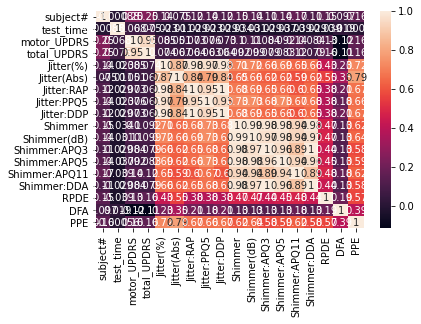

In [14]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

**Correlation heatmap shows us variables are normally correlated.**

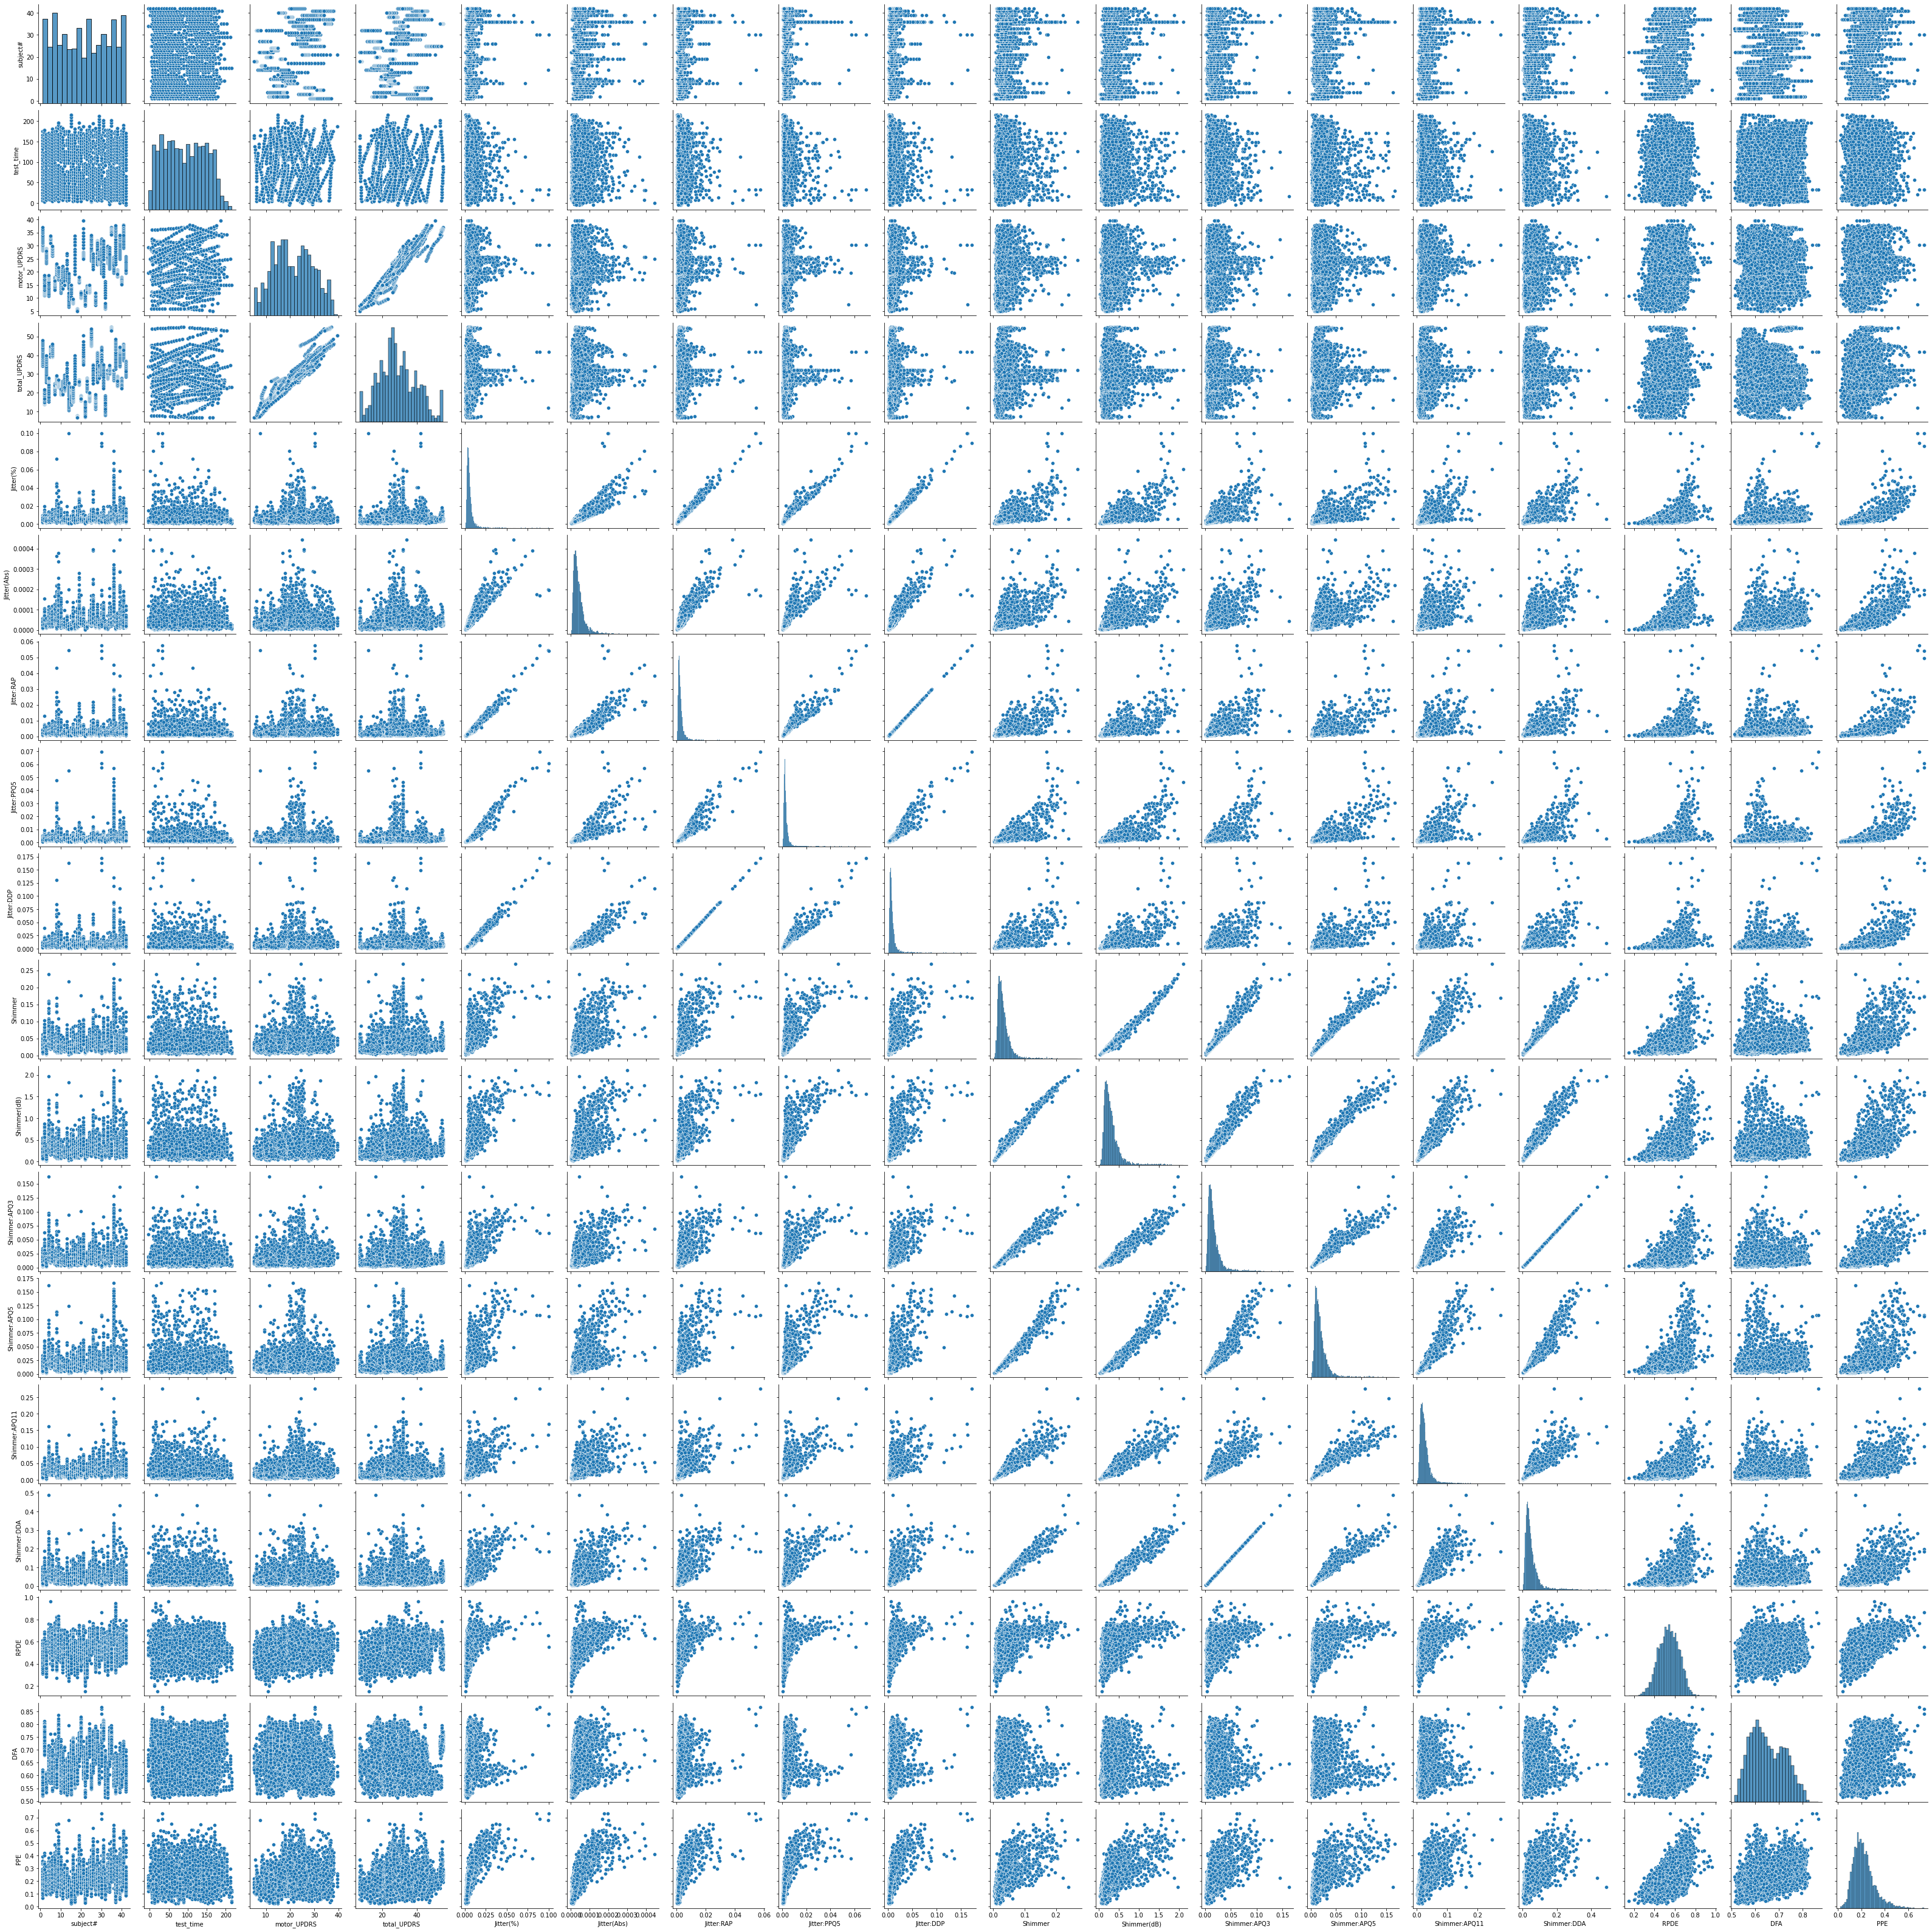

In [15]:
sns.pairplot(ps)

**On this pairplot we can see how discriminate healthy people and people with PD.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


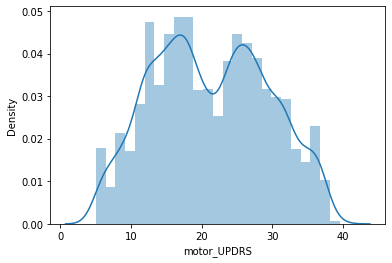

In [16]:
sns.distplot(ps['motor_UPDRS'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


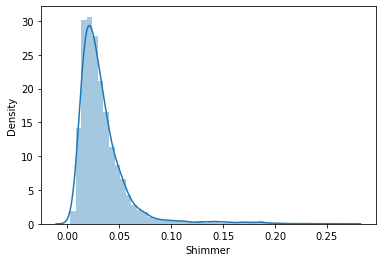

In [17]:
sns.distplot(ps['Shimmer'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


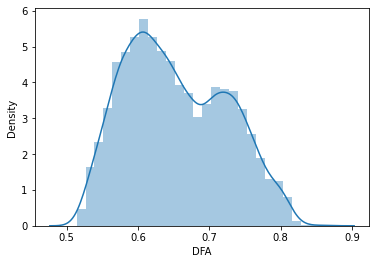

In [20]:
sns.distplot(ps['DFA'])

(array([[16.,  2.,  0., ...,  0.,  0.,  0.],
        [16.,  2.,  0., ...,  0.,  0.,  0.],
        [15.,  3.,  0., ...,  0.,  0.,  0.],
        ...,
        [14.,  2.,  1., ...,  1.,  0.,  0.],
        [14.,  2.,  1., ...,  1.,  0.,  0.],
        [14.,  2.,  1., ...,  1.,  0.,  0.]]),
 array([ -4.2625 ,  17.71275,  39.688  ,  61.66325,  83.6385 , 105.61375,
        127.589  , 149.56425, 171.5395 , 193.51475, 215.49   ]),
 <a list of 5875 Lists of Patches objects>)

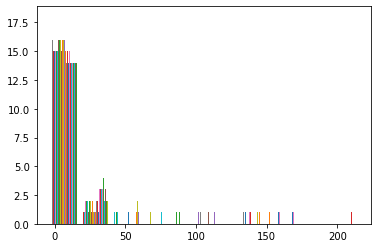

In [19]:
plt.hist(ps)

**Making histogram of Immunotherapy data.**